# Lecture 6 - 16/04/2024

Lecture 6 will be made up of two parts:
1. Analysing SFR of galaxies,
2. Introducing Galaxy Enviroments.

This notebook will focus on (1), look for Lecture6_2 for more information about point (2).

## 1. Main Sequence of Star Forming Galaxies
### Introduction

On Lecture 5, we focused on analysing SFR of galaxies in SDSS and have tried to find related physical properties. Some of our conclusions are:
- we cannot explain a galaxy made up by both young and old stars using only SSP. 
- using more complex SFH (-> composite stellar population CSP), i.e. double exponential, we obtain results which seem to be in agrrement with our understanding of the universe (i.e. higher SFR in the past).

$$SFR(t) = e^{-t/\tau} \times N \qquad \mathrm{where} \; t \in (0, \mathrm{age})\, ,$$


where $N$ is a normalization factor, which is different for each galaxy and is fixed so that:

$$M_* = (1 - R) \times \int_0^\mathrm{age} SFR'(t) dt \, , $$

where $M_*$ is the stellar mass of the galaxy and $R$ is the fraction of stellar mass returned to gas through various processes, i.e. from stellar winds or supernova. $R$ depends on the age of the galaxy: for a young stellar population $R = 0$, as stellar winds aren't strong enough to lose a significant part of stellar mass.

Other properties of the SFR are:
- the value we measure is the "instantaneous" one, meaning measured at $t = $ age;
- we can measure SFR directly by observing emission lines (see Lecture 4) and by assuming continuus SFR for at least 10 milion years. To compare this value to the ones we measure through galaxy models we need to average the SFH over the time
 $$ <SFR>_{10 Myr} = \frac{\int_{\mathrm{age} - 10 Myr}^\mathrm{age} dt \, SFR'(t)}{\int_{\mathrm{age} - 10 Myr}^\mathrm{age} dt}\, ;$$
- we can define a specific SFR, which is the efficiency in star formation of the galaxy
  $$sSFR = \frac{SFR}{M_*} = \left[\frac{M_\odot}{ yr\, \cdot M_\odot }\right] = \left[\frac{1}{yr}\right] \, .$$

Last time, we used TopCat to plot SFR vs Stellar mass (in log scale).

![SFR vs Stellar Mass](SFR_stellarmass.jpg)

We saw that most galaxies live in the **Main Sequence of Star Forming Galaxies**. By fixing $M_*$, we see that galaxies can have different SFRs, especially at larger masses. For example, in the first Lectures we analyses different galaxies (G1, 2 and 3). We can now identify their position in the plot: G3 is large and does not form stars meaning it is a passive galaxy, while G1 was effectively in the Main Sequence.

But there could be other physical variable related to SFR and $M_*$ which could help us identify galaxies, as we can see in the following plots:

![SFR vs Stellar Mass vs colour](SFR_mass_colour.jpg)

What could these colours represent? Both colour (of the galaxy red -> blue, related to superficial temperature of stars) and metallicity could be good guesses, as they both change with stellar mass and age, but they actually represent *galaxy shapes*, using the Sersic index. A low Sersic index in the main sequence will identify a disk morphology, while a more elliptical shape (red) will be related to passive galaxies.

### Today's analysis: Main Sequence fit

Further analysis on SFR could include:
- taking bins of stellar mass and counting passive galaxies,
- fitting the main sequence.

We have decided to first **fit the main sequence**, to be able to discriminate between active and passive galaxies.

In [21]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import stats

In [22]:
#opening the data and checking the length
SDSS = fits.open('SDSS_LAB2024_CIGALEresults.fits')
n_galaxies = len(SDSS[1].data[:])
print(n_galaxies)

92483


We want to plot SFR vs Stellar mass but, unlike Lecture 5, we will now use the entire SDSS catalogue.

In [23]:
#collecting data into arrays: for now it is in linear scale
stellar_mass = []
sfr = []

for i in range(n_galaxies):
    stellar_mass.append(SDSS[1].data[i][21])
    sfr.append(SDSS[1].data[i][7])

stellar_mass = np.array(stellar_mass)
sfr = np.array(sfr)

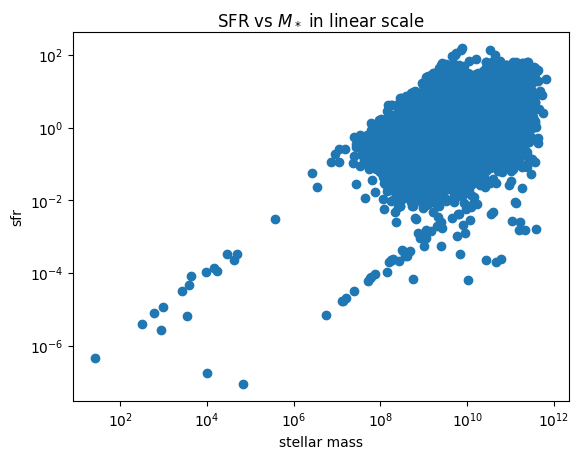

In [24]:
plt.scatter(stellar_mass, sfr)
plt.xlabel('stellar mass')
plt.ylabel('sfr')
plt.title('SFR vs $M_*$ in linear scale')
plt.loglog()
plt.show()

But we know that galaxies tend to have stellar mass $\geq 10^8 M_\odot$, thus we remove any point outside the range

In [25]:
index_to_remove = []

for i in range(n_galaxies):
    if stellar_mass[i] < 5E+7: index_to_remove.append(i)

a = np.delete(stellar_mass, index_to_remove)
b = np.delete(sfr, index_to_remove)

print('number of removed points: ', len(index_to_remove))
print('number of galaxies left: ', len(a))
index_to_remove.clear()

number of removed points:  67
number of galaxies left:  92416


We now want to fix a threshold to discriminate passive galaxies. This way, our Main Sequence fit will be more precise.

To do this more easily, we plot the specific star formation rate (sSFR) vs stellar mass which returns an horizontal plot. We move to a logarithmic scale and fix the threshold to -11.

In [26]:
aa = np.log10(a) #log of stellar mass
bb = np.log10(b) #log of sfr

cc = bb - aa #log of specific sfr
print('number of gala active and passive galaxies: ', len(cc))

number of gala active and passive galaxies:  92416


number of passive galaxies:  1006
number of active galaxies:  91410


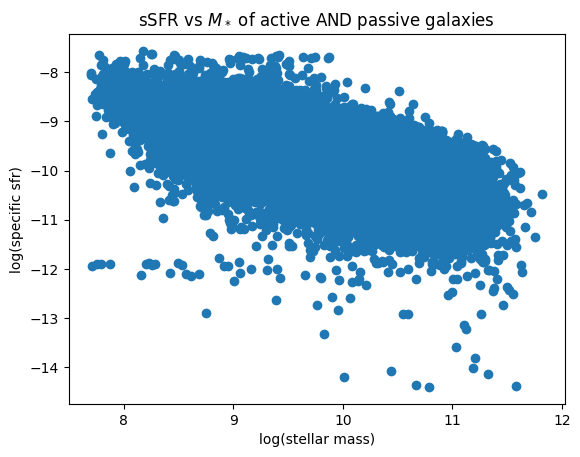

In [27]:
plt.scatter(aa, cc)
plt.title('sSFR vs $M_*$ of active AND passive galaxies')
plt.xlabel('log(stellar mass)')
plt.ylabel('log(specific sfr)')

index = []
for i in range(len(aa)):
    if (cc[i] < -11): index.append(i)

log_s_mass =  np.delete(aa, index)
log_sfr = np.delete(bb, index)
log_s_sfr = np.delete(cc, index)


print('number of passive galaxies: ', len(index))
print('number of active galaxies: ', len(log_s_sfr))

index.clear()

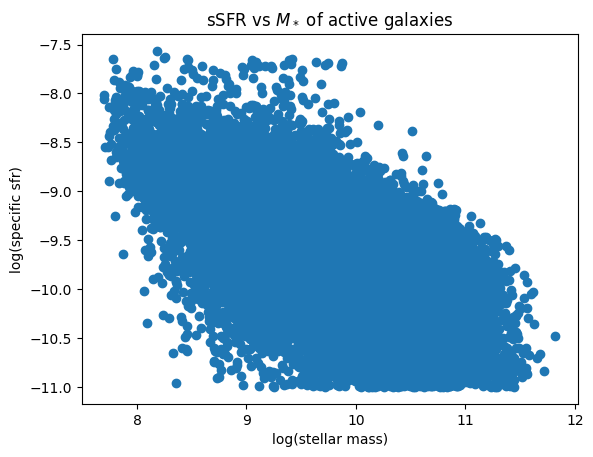

In [28]:
plt.scatter(log_s_mass, log_s_sfr)
plt.xlabel('log(stellar mass)')
plt.ylabel('log(specific sfr)')
plt.title('sSFR vs $M_*$ of active galaxies')
plt.show()

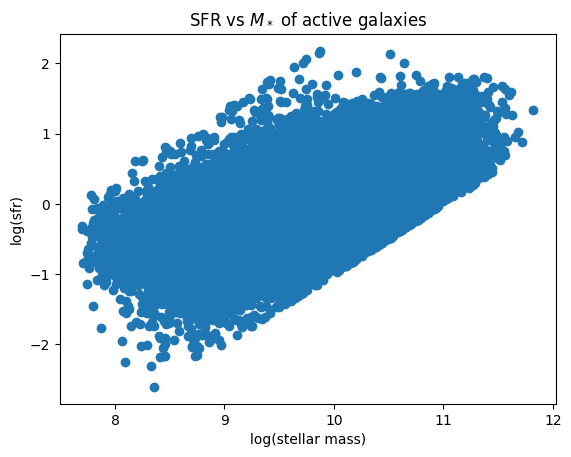

In [29]:
plt.scatter(log_s_mass, log_sfr)
plt.xlabel('log(stellar mass)')
plt.ylabel('log(sfr)')
plt.title('SFR vs $M_*$ of active galaxies')
plt.show()

Now that we have identified **active** galaxies, we can fit our Main Sequence. First we use a straight line:

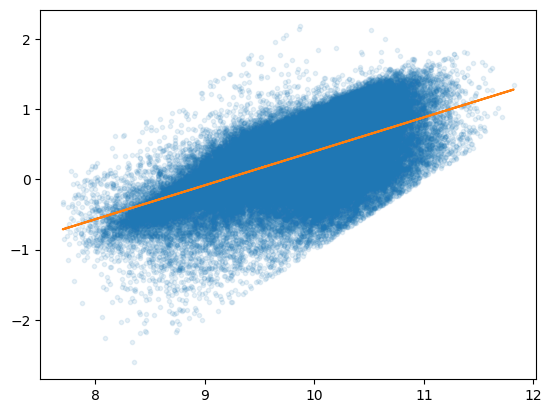

In [32]:
result_new = stats.linregress(log_s_mass, log_sfr)
x_linear = np.copy(log_s_mass)
y_linear = np.multiply(result_new.slope, x_linear) + result_new.intercept
plt.plot(log_s_mass, log_sfr, ".", alpha = 0.1)
plt.plot(x_linear, y_linear)

Then, we can fit with a polynomial series up to n-th degree.

In [98]:
x_pol = np.copy(log_s_mass)
y_pol = np.copy(log_sfr)
pol_coeff = np.polynomial.polynomial.polyfit(x_pol, y_pol, 3)
x_pol.sort()

def poly_fit(coeff, x):
    return coeff[0] + x*coeff[1] + coeff[2] * x**2 + coeff[3] * x**3

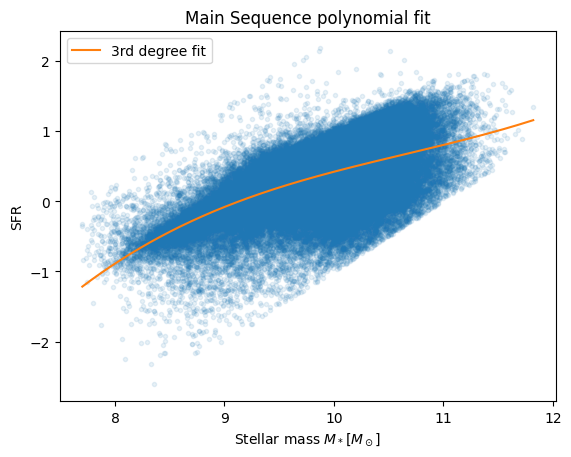

In [100]:
plt.plot(log_s_mass, log_sfr, ".", alpha = 0.1)
plt.plot(x_pol, poly_fit(pol_coeff, x_pol), label= '3rd degree fit')
plt.title('Main Sequence polynomial fit')
plt.xlabel('Stellar mass $M_* [M_\odot]$')
plt.ylabel('SFR')
plt.legend()
plt.show()